In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
df = df.drop(['RowNumber','Surname','CustomerId'],axis=1)

In [16]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit','not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [21]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

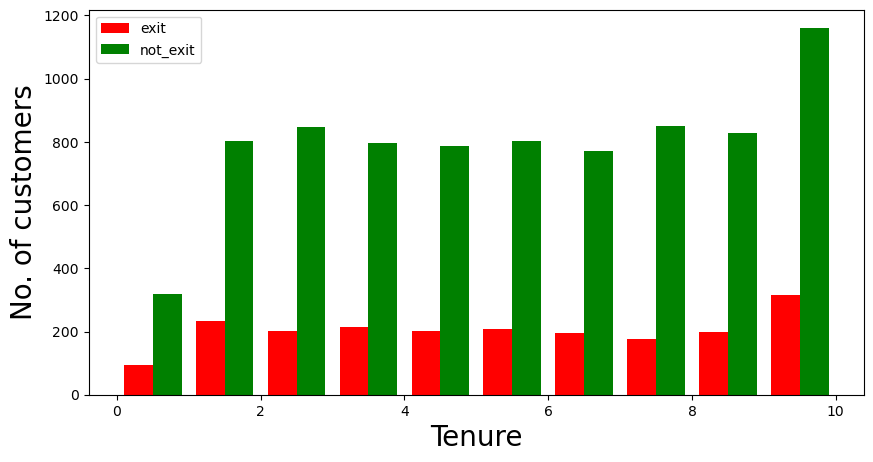

In [22]:
visualization(df_churn_exited, df_churn_not_exited,"Tenure")

In [23]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

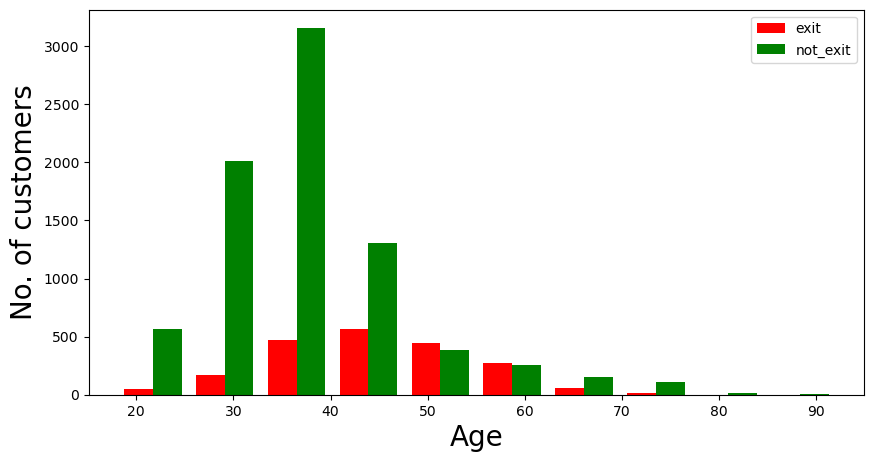

In [24]:
visualization(df_churn_exited2, df_churn_not_exited2, "Age")

In [25]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [26]:
df = pd.concat([df,gender,states], axis = 1)

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [28]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]

In [29]:
y = df['Exited']

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
X_train

array([[ 1.89954954e+00, -4.76486517e-01, -1.52640843e-03, ...,
         9.09504901e-01, -5.81309289e-01,  1.74334114e+00],
       [ 1.61952531e+00, -3.80792768e-01, -6.90872149e-01, ...,
         9.09504901e-01, -5.81309289e-01, -5.73611200e-01],
       [ 1.18393207e+00, -5.72180265e-01, -1.52640843e-03, ...,
        -1.09949930e+00, -5.81309289e-01,  1.74334114e+00],
       ...,
       [ 3.12745578e-01,  1.72446971e+00, -1.03554502e+00, ...,
        -1.09949930e+00, -5.81309289e-01,  1.74334114e+00],
       [ 8.20937696e-01, -1.33773026e+00, -1.52640843e-03, ...,
         9.09504901e-01, -5.81309289e-01,  1.74334114e+00],
       [-1.33218934e-01,  1.98222765e-03, -1.72489076e+00, ...,
        -1.09949930e+00,  1.72025464e+00, -5.73611200e-01]])

In [34]:
X_test

array([[-4.96213304e-01, -4.76486517e-01,  1.37716507e+00, ...,
        -1.09949930e+00, -5.81309289e-01, -5.73611200e-01],
       [ 7.89823893e-01, -1.24203651e+00,  1.37716507e+00, ...,
        -1.09949930e+00, -5.81309289e-01, -5.73611200e-01],
       [-7.09913275e-02,  7.67532218e-01,  1.37716507e+00, ...,
         9.09504901e-01,  1.72025464e+00, -5.73611200e-01],
       ...,
       [ 3.23116846e-01, -2.85099019e-01, -1.52640843e-03, ...,
         9.09504901e-01, -5.81309289e-01,  1.74334114e+00],
       [-2.99159217e-01,  1.98222765e-03,  1.37716507e+00, ...,
        -1.09949930e+00, -5.81309289e-01, -5.73611200e-01],
       [-7.14009926e-01, -1.33773026e+00,  1.37716507e+00, ...,
         9.09504901e-01, -5.81309289e-01,  1.74334114e+00]])

In [35]:
import keras #Keras is the wrapper on the top of tenserflow
#Can use Tenserflow as well but won't be able to understand the errors initially. 

In [36]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers

In [37]:
classifier = Sequential()

In [38]:
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform")) 

In [39]:
classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

In [40]:
classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) #Final neuron will be having siigmoid function

In [41]:
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output

In [42]:
classifier.summary() #3 layers created. 6 neurons in 1st,6neurons in 2nd layer and 1 neuron in last

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
classifier.fit(X_train,y_train,batch_size=10,epochs=50) #Fitting the ANN to training dataset

Epoch 1/50
700/700 [==============================] - 2s 2ms/step - loss: 0.5103 - accuracy: 0.7969
Epoch 2/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4299 - accuracy: 0.7973
Epoch 3/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4244 - accuracy: 0.7973
Epoch 4/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4200 - accuracy: 0.7973
Epoch 5/50
700/700 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8204
Epoch 6/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4133 - accuracy: 0.8294
Epoch 7/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4112 - accuracy: 0.8337
Epoch 8/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4095 - accuracy: 0.8334
Epoch 9/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4077 - accuracy: 0.8363
Epoch 10/50
700/700 [==============================] - 1s 1ms/step - loss: 0.4071 - accuracy: 0.8349

In [44]:
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5) #Predicting the result

94/94 [==============================] - 0s 1ms/step


In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [46]:
cm = confusion_matrix(y_test,y_pred)

In [47]:
cm

array([[2312,   70],
       [ 444,  174]], dtype=int64)

In [48]:
accuracy = accuracy_score(y_test,y_pred)

In [49]:
accuracy

0.8286666666666667

Text(95.72222222222221, 0.5, 'Truth')

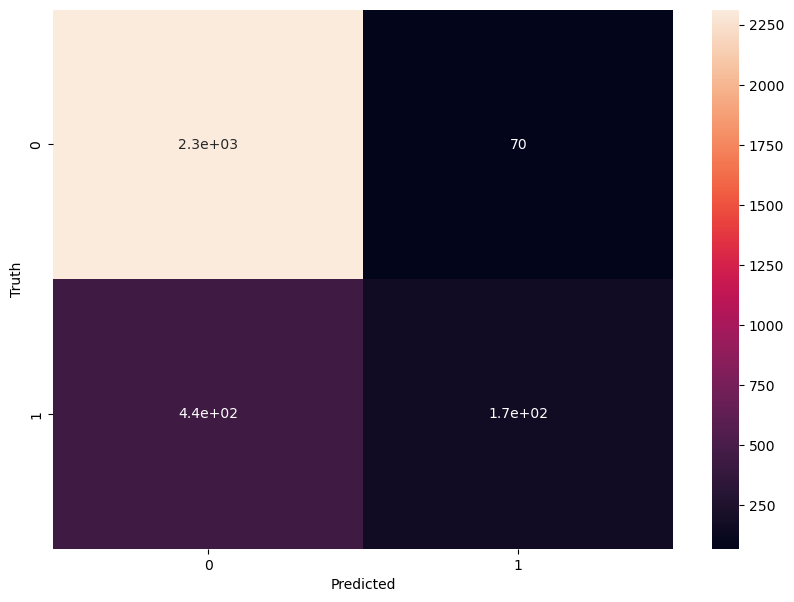

In [50]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2382
           1       0.71      0.28      0.40       618

    accuracy                           0.83      3000
   macro avg       0.78      0.63      0.65      3000
weighted avg       0.81      0.83      0.80      3000

